# Ford GoBike System Data Exploration

## Investigation Overview

In this project I will investigate the relation between the number of trips made and the average trip duration and the other variables like gender, station, subscription status, age and some other variables.

## Data Description

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Data Wrangling

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gobike = pd.read_csv('Desktop/Project/201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.shape

(183412, 16)

In [4]:
print(gobike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

There are some missing values in some columns of the data and some of the dtypes need to changed

In [5]:
gobike.isnull().sum(axis=0)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
8265/183412

0.04506248228033062

Almost 5% of the data observations contain missing values, drop them

In [7]:
gobike.dropna(inplace=True)

In [8]:
gobike.isnull().sum(axis=0)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
time_features = ['start_time', 'end_time']
for time in time_features:
    gobike[time] = pd.to_datetime(gobike[time])

# Add 3 more features, the start day, start month and start hour
gobike['start_day'] = gobike.start_time.dt.day_name()
gobike['start_month'] = gobike.start_time.dt.month_name()
gobike['start_hour'] = gobike.start_time.dt.hour

# Add two more Features of end day, end hour
gobike['end_day'] = gobike.end_time.dt.day_name()
gobike['end_hour'] = gobike.end_time.dt.hour

# Convert id features into integers
integer_features = ['start_station_id', 'end_station_id', 'member_birth_year']
for feat in integer_features:
    gobike[feat] = gobike[feat].astype(int)

In [11]:
print(gobike.start_day.unique())
print(gobike.end_day.unique())

['Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday']
['Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday']


In [12]:
# Convert the start, end day into categorical variables
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_days = pd.api.types.CategoricalDtype(ordered=True, categories = week_days)
gobike.start_day = gobike.start_day.astype(ordered_days) 
gobike.end_day = gobike.end_day.astype(ordered_days)

In [13]:
gobike.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
start_day                       7
start_month                     1
start_hour                     24
end_day                         7
end_hour                       24
dtype: int64

There are three types of genders, and only one month

In [14]:
gobike.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [15]:
gobike.query("member_gender == 'Other'").shape

(3647, 21)

3647 users entered their gender as others

In [16]:
gobike.duplicated().sum()

0

No duplicates

In [17]:
inconsistent_duration = ((gobike.end_time - gobike.start_time)/pd.Timedelta(seconds=1) - gobike.duration_sec) > 1
gobike[inconsistent_duration]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_hour


In [18]:
gobike[gobike.start_station_id == gobike.end_station_id].shape

(3458, 21)

3458 observations started and ended in the same station

#### The current year is 2021, we can calculate the age of the useres

In [19]:
gobike['age'] = 2021 - gobike.member_birth_year

In [20]:
gobike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,Thursday,February,17,Friday,8,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,Thursday,February,12,Friday,5,49


In [21]:
numeric_features = ['duration_sec', 'start_hour', 'end_hour', 'age']
gobike[numeric_features].describe()

,duration_sec,start_hour,end_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,13.456165,13.609533,36.196865
std,1642.204905,4.734282,4.748029,10.118731
min,61.000000,0.000000,0.000000,20.000000
25%,323.000000,9.000000,9.000000,29.000000
50%,510.000000,14.000000,14.000000,34.000000
75%,789.000000,17.000000,18.000000,41.000000
max,84548.000000,23.000000,23.000000,143.000000


In [22]:
gobike[gobike.age > 100].shape

(75, 22)

In [23]:
gobike[gobike.age == 143]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_hour,age
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,...,Customer,1878,Female,No,Monday,February,9,Monday,9,143


### What is the goal of the analysis?
there are about 180 thousand observations in the dataset of bike users.

>I am interested in fguring out what is the average duration of a trip, when the most trips are taken in terms of the time and the start station. the relation between the average trip duration and the forementioned variables, and whether or not the start and end stations are the same. 

## Univariate Exploration

### The Distribution of the duration

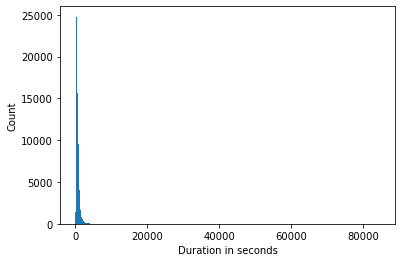

In [24]:
bin_size = 100
bins = np.arange(0, gobike.duration_sec.max()+bin_size, bin_size)
plt.hist(data=gobike, x='duration_sec', bins=bins)
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.show()

put the x axis on a log scale

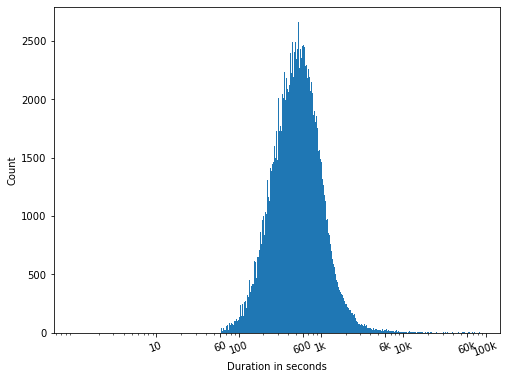

In [25]:
plt.figure(figsize=[8, 6])
bin_size = .01
bins = 10 ** np.arange(0, np.log10(gobike.duration_sec.max())+bin_size, bin_size)
plt.hist(data=gobike, x='duration_sec', bins=bins)
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([10, 60, 100, 600, 1e3, 6e3, 1e4, 6e4, 1e5], [10, 60, 100, 600, '1k', '6k', '10k', '60k', '100k'], rotation=20)
plt.show()

The distribuiton looks pretty normal on a log scale with an average of 700, but slightly skewed to the right.

In [26]:
gobike[gobike.duration_sec > 6000].shape

(703, 22)

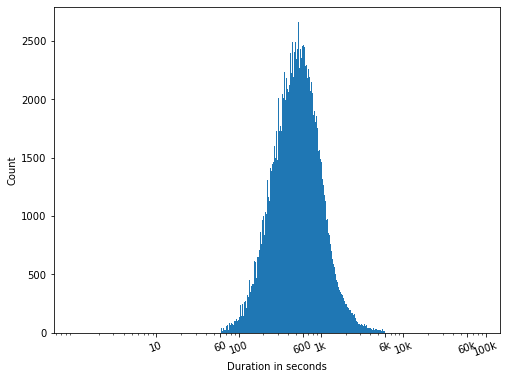

In [27]:
plt.figure(figsize=[8, 6])
bin_size = .01
bins = 10 ** np.arange(0, np.log10(gobike.duration_sec.max())+bin_size, bin_size)
plt.hist(data=gobike[gobike.duration_sec < 6000], x='duration_sec', bins=bins)
plt.xlabel('Duration in seconds')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([10, 60, 100, 600, 1e3, 6e3, 1e4, 6e4, 1e5], [10, 60, 100, 600, '1k', '6k', '10k', '60k', '100k'], rotation=20)
plt.show()

Looks like the 703 observations of duration greater than 6k seconds dont affect the shape of the distribution that much

### User Type distribution

In [28]:
# helper_funciton
def plot_percentages(counts, locs, labels, v):
    for loc, label in zip(locs, labels):
        count = counts[label.get_text()]
        string = '{:.1f}%'.format(100*count/N)
        plt.text(loc, count+v, string, ha='center')

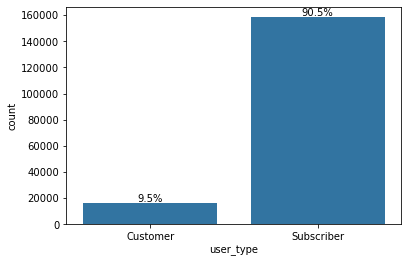

In [29]:
user_type_counts = gobike.user_type.value_counts()
N = gobike.shape[0]

base_color = sns.color_palette()[0]
sns.countplot(data=gobike, x='user_type', color=base_color)
locs, labels = plt.xticks()

plot_percentages(user_type_counts, locs, labels, 1000)
plt.show()

Most of the users are subscribers, about 90% are subscribers

### Distribution of Gender

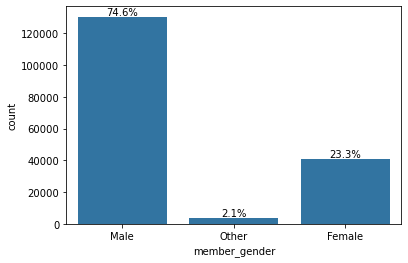

In [30]:
gender_counts = gobike.member_gender.value_counts()

sns.countplot(data=gobike, x='member_gender', color=base_color)

locs, labels = plt.xticks()
plot_percentages(gender_counts, locs, labels, 1000)
plt.show()

74.6% of the members are males, 23.3% are females and about 2.1% used other

### The distribution of the start and end days

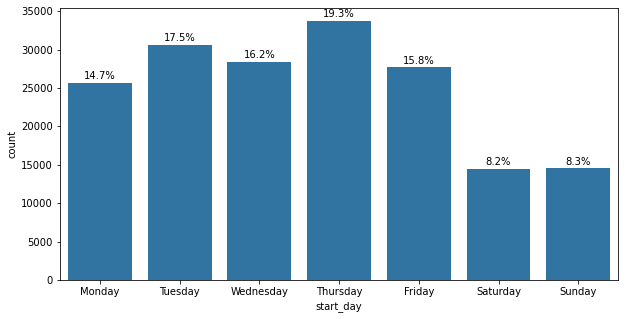

In [31]:
plt.figure(figsize=[10, 5])
start_day_counts = gobike.start_day.value_counts()
sns.countplot(data=gobike, x='start_day', color=base_color)
locs, labels = plt.xticks()
plot_percentages(start_day_counts, locs, labels, 500)

The distribution seems to be bimodal.Most of the trips are dont on the work days, the dayt of the highest number of trips is thursday and the day of the least is saturday

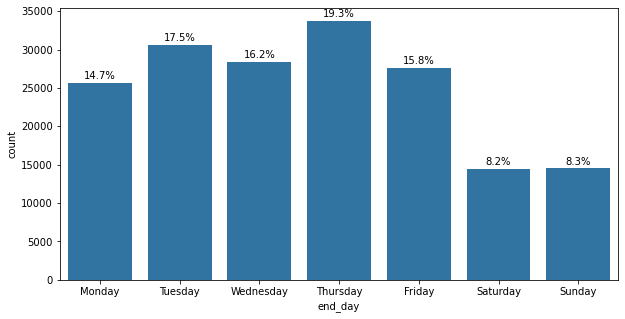

In [32]:
plt.figure(figsize=[10, 5])
end_day_counts = gobike.end_day.value_counts()
sns.countplot(data=gobike, x='end_day', color=base_color)
locs, labels = plt.xticks()
plot_percentages(end_day_counts, locs, labels, 500)

In [33]:
gobike[gobike.start_day != gobike.end_day].shape

(283, 22)

The end day of the trip has the same distribution. only 283 trips ended in a day different from the start day.

### Start and End hour distributions

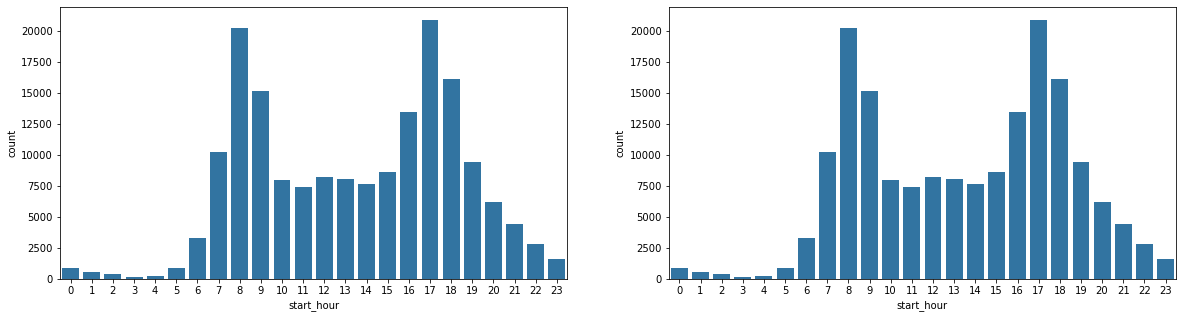

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=[20, 5])
sns.countplot(data=gobike, x='start_hour', color=base_color, ax=ax[0])
sns.countplot(data=gobike, x='start_hour', color=base_color, ax=ax[1])
plt.show()

The distribution looks bimodal with most of the rides start at 8 or 17 and most of them also end at 8 or 17. That would suggest the existence of a cyclic behavior, aride starts just after the other one ends.

### The Distribution of Bikes Used

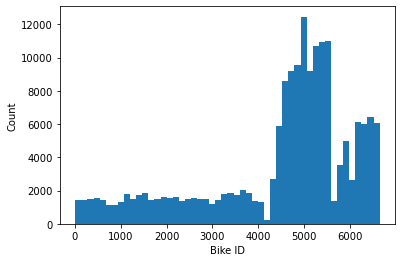

In [35]:
plt.hist(data=gobike, x='bike_id', bins=50)
plt.xlabel('Bike ID')
plt.ylabel('Count')
plt.show()

The distribution implies that some bikes are used more than others, those with id greater than 4100 and less than 5600 are the most used bikes

### The distribution of the Age

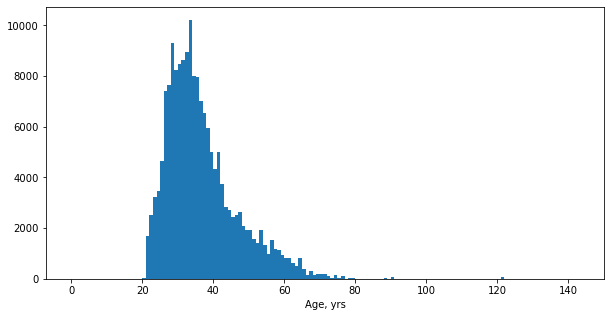

In [36]:
plt.figure(figsize=[10, 5])
binsize = 1
bins = np.arange(0, gobike.age.max() + binsize, binsize)
plt.hist(data=gobike, x='age', bins=bins)
plt.xlabel('Age, yrs')
plt.show()

The distribution looks right skewed with the exitence of some outliers, people older than 80.

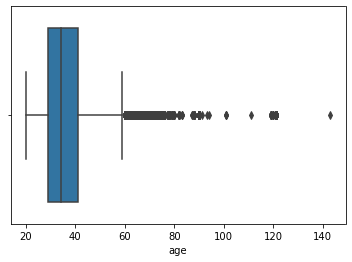

In [37]:
sns.boxplot(data=gobike, x='age')
plt.show()

Outliers are the users who are older than 60

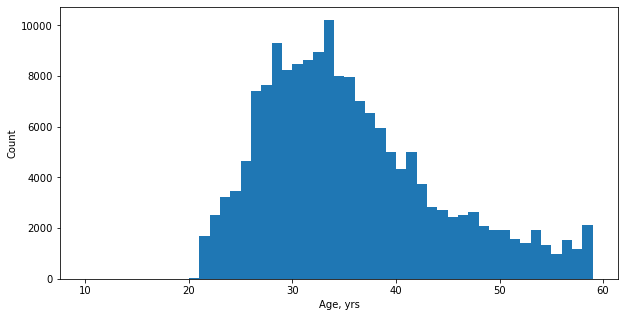

In [38]:
plt.figure(figsize=[10, 5])
binsize = 1
bins = np.arange(10, 60, binsize)
plt.hist(data=gobike, x='age', bins=bins)
plt.xlabel('Age, yrs')
plt.ylabel('Count')
plt.show()

### The distribution of the start stations

Since the start stations number is 329 stations, it won't be poosible to make a bar chart of the distribution of the start stations. But we can use the start station id to get more insight on which sations have the highest number of trips

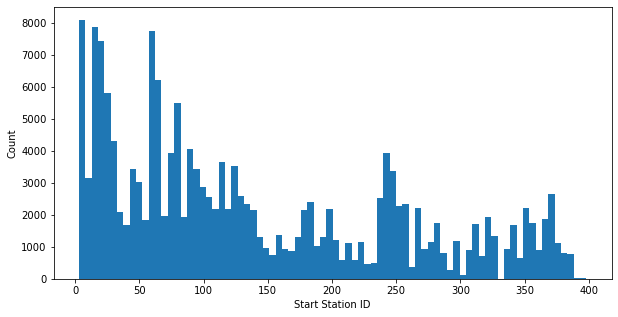

In [39]:
plt.figure(figsize=[10, 5])
plt.hist(data=gobike, x='start_station_id', bins=80)
plt.xlabel('Start Station ID')
plt.ylabel('Count')
plt.show()

The histogram shows some peaks which indicate some stations have more frequent trips than others.

### Bike Shared For All Trips

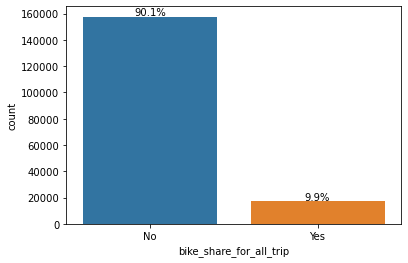

In [40]:
bikes_share_counts = gobike.bike_share_for_all_trip.value_counts()
sns.countplot(data=gobike, x='bike_share_for_all_trip')
locs, labels = plt.xticks()
plot_percentages(bikes_share_counts, locs, labels, 1000)

About 90% of bikes aren't shared

## Discussion

The trip duration took a log normal distribution. 

About 90% of the users are subscribers and most of the useres are males.

Most of the trips are done on thursrday and tuesday.

The distribution of the start and end hours is bimodal with two peaks at 8 and 17 o'clock.

Some useres are pretty old above 100 years old. some start stations have larger number of trips than others.

## Bivariate Exploration

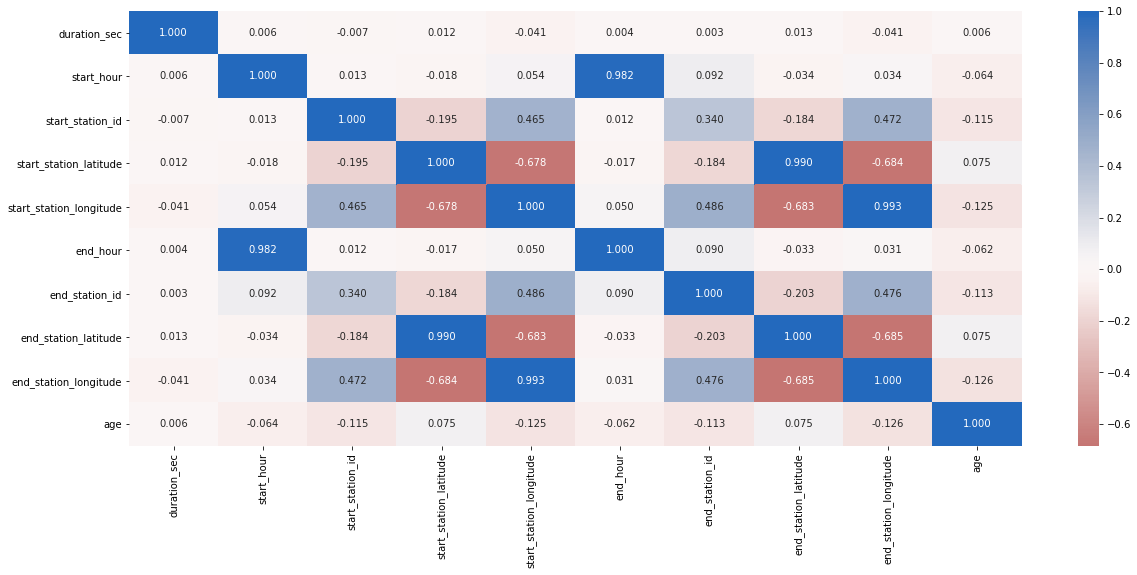

In [41]:
numeric_features = ['duration_sec', 'start_hour', 'start_station_id', 'start_station_latitude','start_station_longitude',
                    'end_hour','end_station_id', 'end_station_latitude', 'end_station_longitude','age']

plt.figure(figsize=[20, 8])
sns.heatmap(gobike[numeric_features].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show()

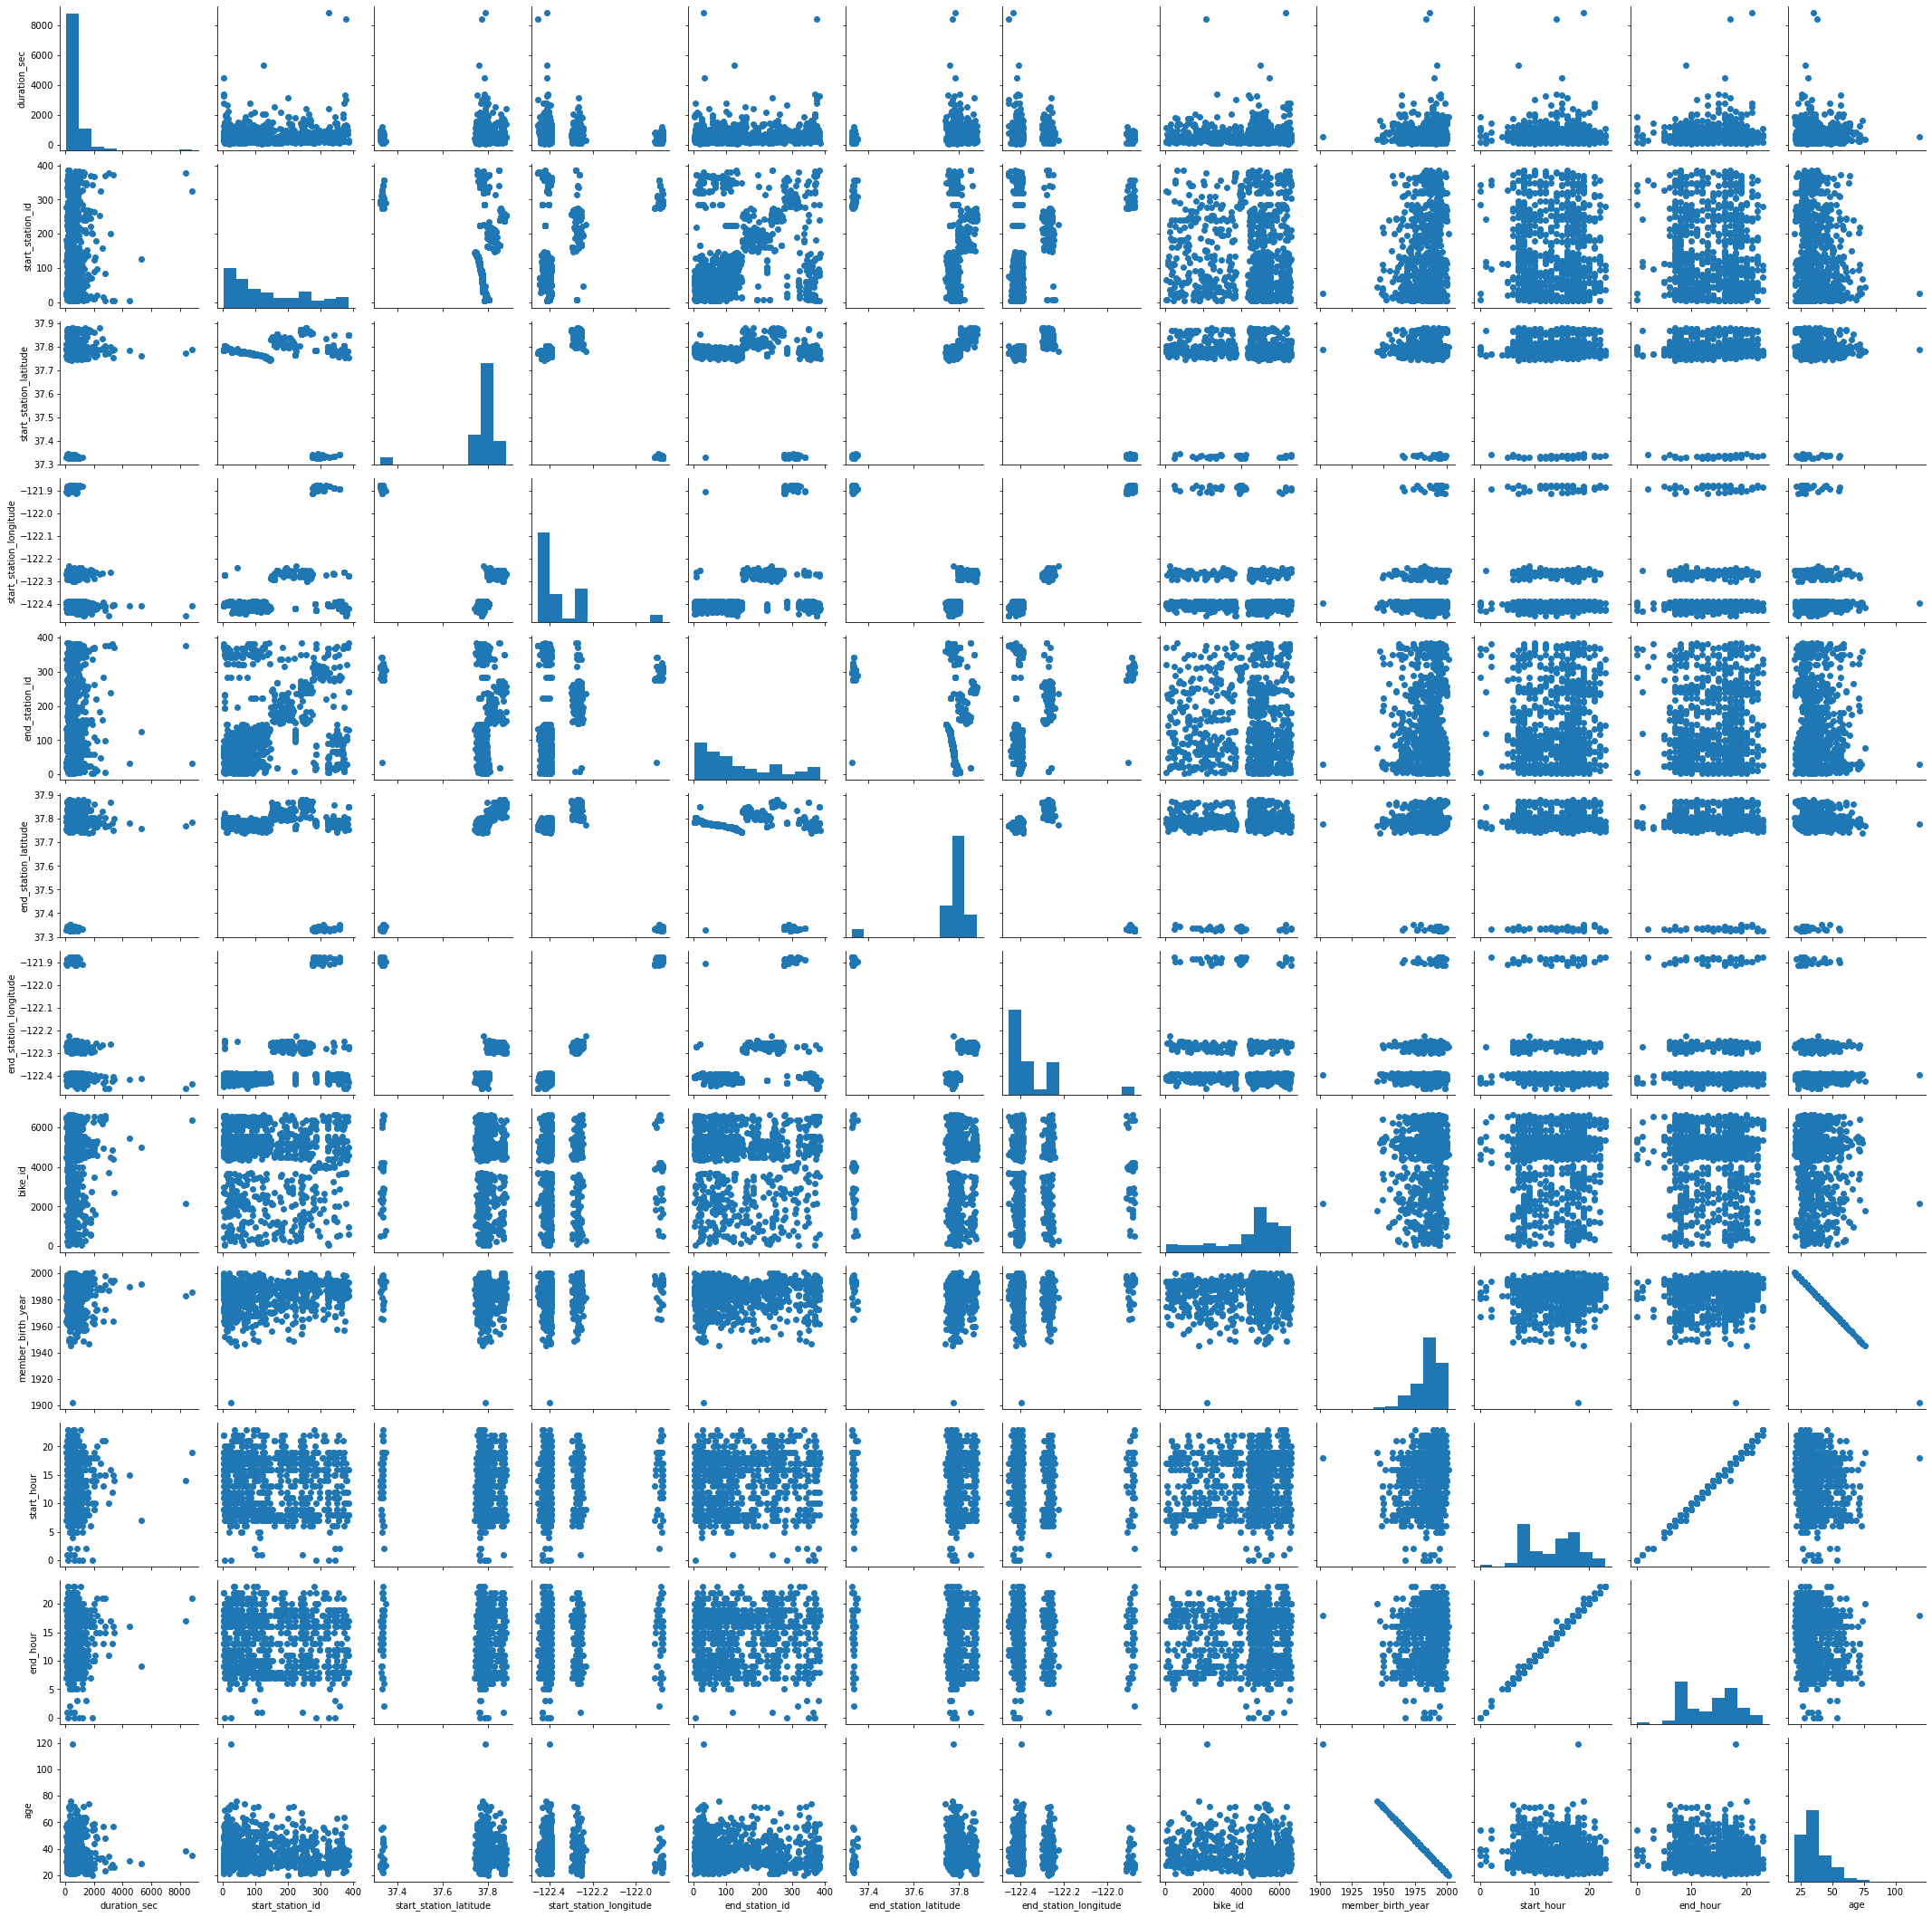

In [42]:
# Plot matrix
sample = gobike.sample(1000, replace=False)

g = sns.PairGrid(data=sample)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

We can't draw useful information from those plots since most of the interesting features are categorical

### Distribution of Duration Considering User Type, Gender, Start day

#### User Type

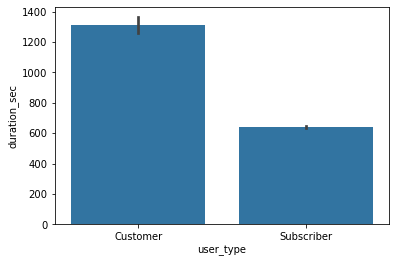

In [43]:
sns.barplot(data=gobike, x='user_type', y='duration_sec', color=base_color)
plt.show()

Customers tend to have longer trips than subscribers.

The average duration for customers is 1300 while for subscribers is about 600

#### Gender

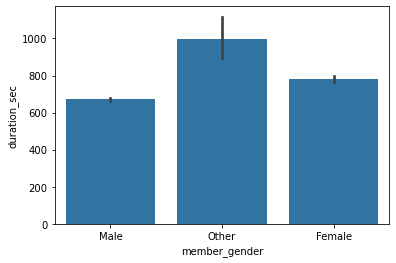

In [44]:
sns.barplot(data=gobike, x='member_gender', y='duration_sec', color=base_color)
plt.show()

The Males tend to have the shortest trips on average while the users with gender 'other' have the longest trips

#### Start Day

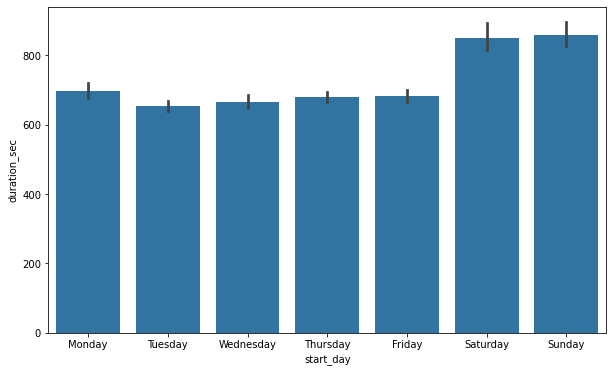

In [45]:
plt.figure(figsize=[10, 6])
sns.barplot(data=gobike, x='start_day', y='duration_sec', color=base_color)
plt.show()

Even Though I found that the number of trips in the weekend is the shortest, the longest trips are taken on saturday and sunday

### Effect of Start Hour on Average Duration

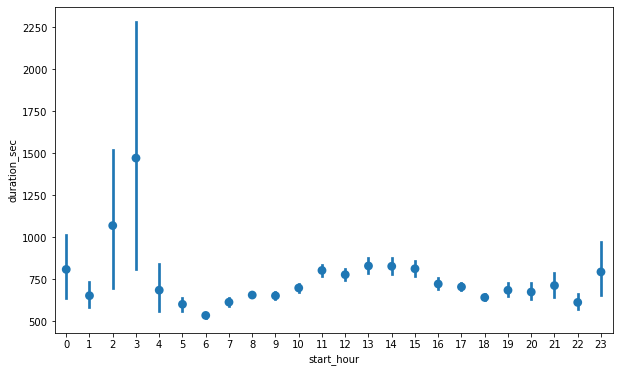

In [46]:
plt.figure(figsize=[10, 6])
# sns.barplot(data=gobike, x='start_hour', y='duration_sec', color=base_color)
sns.pointplot(data=gobike, y='duration_sec', x='start_hour', linestyles='')
plt.show()

The average duration time takes a wave like distribution across the start hours, with a peak at 3 o'clocl and the shortest trips tend to start at 6 o'clock

### The Duration Vs the Start Station ID

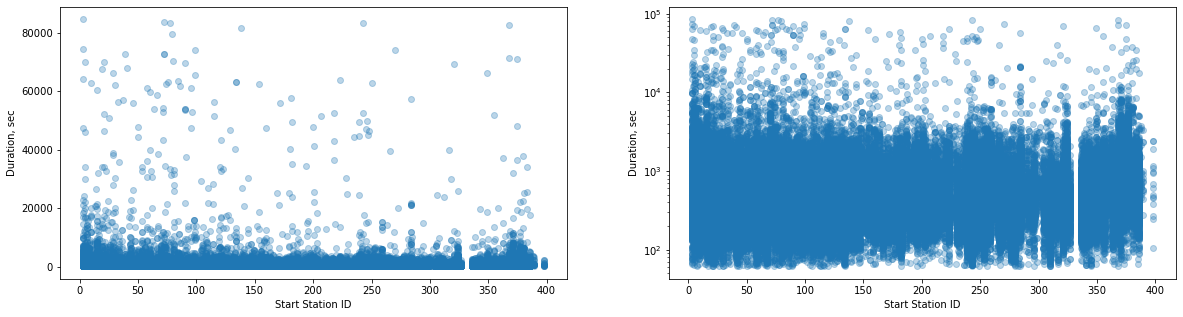

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=[20, 5])
ax[0].scatter(data=gobike, x='start_station_id', y='duration_sec', alpha = .3)
ax[0].set_xlabel('Start Station ID')
ax[0].set_ylabel('Duration, sec')
ax[1].scatter(data=gobike, x='start_station_id', y='duration_sec', alpha = .3)
plt.yscale('log')
ax[1].set_xlabel('Start Station ID')
ax[1].set_ylabel('Duration, sec')
plt.show()

The scatter plot of the duration vs the start statio ID looks pretty random. We can not obtain much insight of it.

I will divide the start station id into regions [0, 30[, [30, 90[, [90, 120[, [120, 150[, [150, 180[, [180, 210[, [210, 240[, [240, 270[, [270, 300[, [300, 330[, [330, 360[, [360, 390[, [390, 400[

In [48]:
gobike['start_station_category'] = gobike.start_station_id//30

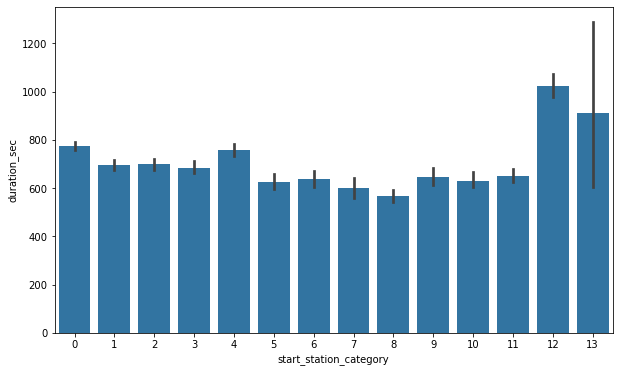

In [49]:
plt.figure(figsize=[10, 6])
sns.barplot(data=gobike, x='start_station_category', y='duration_sec', color = base_color)
plt.show()

It looks like the stations betwee 360 and 390 have the longest trip duration on average

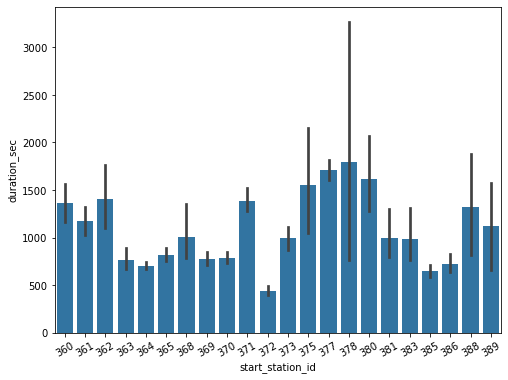

In [50]:
plt.figure(figsize=[8, 6])
potential_stations = gobike.query("start_station_id >= 360 & start_station_id < 390")
sns.barplot(data=potential_stations, x='start_station_id', y='duration_sec', color = base_color)
plt.xticks(rotation=30)
plt.show()

In [51]:
gobike.query("start_station_id == 378").start_station_name.unique()

array(['Empire St at 7th St'], dtype=object)

In [52]:
gobike.query("start_station_id == 377").start_station_name.unique()

array(['Fell St at Stanyan St'], dtype=object)

It looks like within the 30 station that have the longest trip duration on average, the station of the id 378 'Empire St at 7th St' but with a very large variation due to the small number of observations, 28,from that station. On the other hand station 377 'Fell St at Stanyan S' has almost the same average trip duration but with lower variation.

That does not necessarily mean that start station Fell St at Stanyan S has the longest trip duration on average among all the stations.

In [53]:
avg_duration_for_stations = gobike.groupby('start_station_name').duration_sec.mean().round(2).reset_index(name = 'average_duration')
avg_duration_for_stations

,start_station_name,average_duration
0,10th Ave at E 15th St,874.71
1,10th St at Fallon St,996.98
2,10th St at University Ave,819.44
3,11th St at Bryant St,554.70
4,11th St at Natoma St,731.33
...,...,...
324,Williams Ave at 3rd St,1637.00
325,Williams Ave at Apollo St,1204.64
326,Willow St at Vine St,1138.67
327,Woolsey St at Sacramento St,646.49


In [54]:
avg_duration_for_stations[avg_duration_for_stations.average_duration == avg_duration_for_stations.average_duration.max()]

,start_station_name,average_duration
254,San Antonio Park,2647.96


In [55]:
gobike.query("start_station_id == 254").shape

(408, 23)

The station of the longest trip duration on average is San Antonio Park with 408 observations from that station

### The Duration with the Age

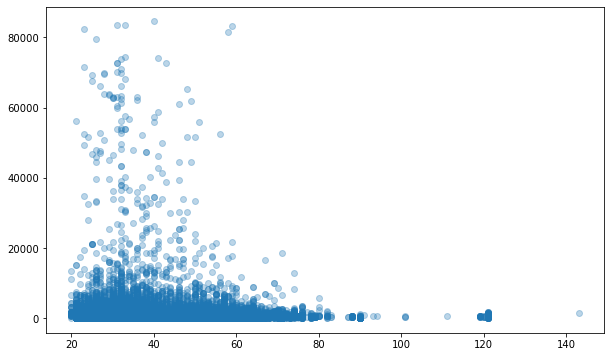

In [56]:
plt.figure(figsize=[10, 6])
plt.scatter(data=gobike, x='age', y='duration_sec', alpha=.3)


plt.show()

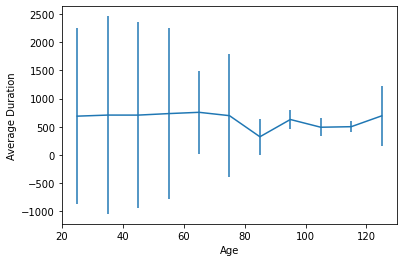

In [57]:
bin_edges = np.arange(20, 150, 10)
bin_centers = bin_edges[:-1] + 5
age_binned = pd.cut(gobike.age, bin_edges, include_lowest=True)

duration_mean = gobike.duration_sec.groupby(age_binned).mean()
duration_std = gobike.duration_sec.groupby(age_binned).std()

plt.errorbar(x=bin_centers, y=duration_mean, yerr=duration_std)
plt.xlabel('Age')
plt.ylabel('Average Duration')

plt.show()

It looks like the average duration decreases with age untill 80 and increases a little bit again

## Discussion

The Bivariate analysis showed us that the average trip duration is longer for customers not subscribers. Also males tend to have the shortest trip duration on average. On Saturday and Sunday the average trip duration is the longest compared to other days while it is the lowest on Tuesday.

The stations with station id in the range of [360, 390[ have the longest trip duration on average.

There is not a strong relation between average trip duration and age but the average duration decreases slightly with age untill 80 years old ind sliglty increases afterwards.

## MultiVariate Exploration

The goal of this part is to investigate the effect of combinations of gender, user type, start day and age on the average duration time.

### Effect of Gender, User Type On The Average Duration Time.

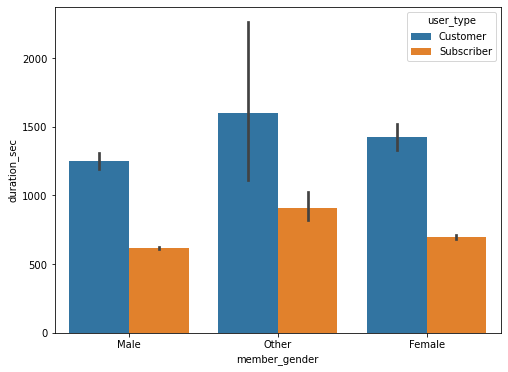

In [58]:
plt.figure(figsize=[8, 6])
sns.barplot(data=gobike, x='member_gender', y='duration_sec',hue='user_type')
plt.show()

Pretty much the same Trend

### Effect of User Type and Start Day on Average Duration Time

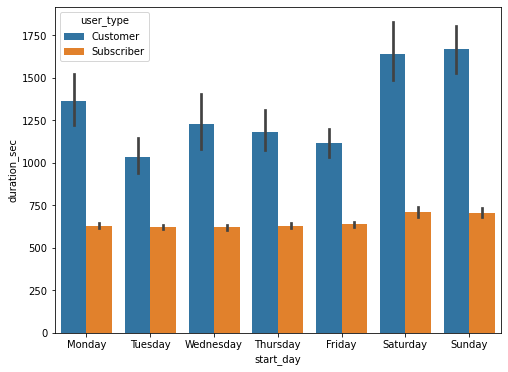

In [59]:
plt.figure(figsize=[8, 6])
sns.barplot(data=gobike, x='start_day', y='duration_sec',hue='user_type')
plt.show()

The same trend applies for both subscribers and customers.

### Effect of User Type and Age on the Average Duration Time

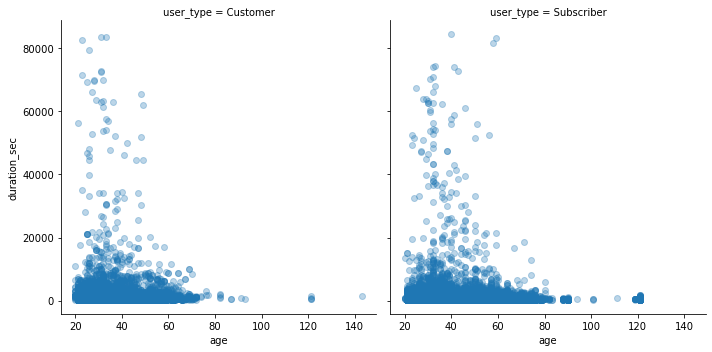

In [60]:
g = sns.FacetGrid(data=gobike, col='user_type', height=5)
g.map(plt.scatter, 'age', 'duration_sec', alpha=.3)
plt.show()

It looks like subscribers younger than 60 have take longer trips on average. Also there are larger number of trips with users older than 80 for subscribers.

### Effect of Start Day and Gender on the Average Duration Time

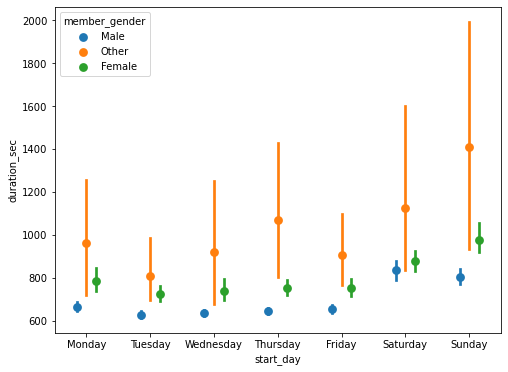

In [61]:
plt.figure(figsize=[8, 6])
sns.pointplot(data=gobike, x='start_day', y='duration_sec',hue='member_gender', linestyles='', dodge=.3)
plt.show()

There is an upward trend going form Monday to Sunday in the average trip duration for all genders.

## Discussion

There was not much to discover here all the patterns shown in the bivariate exploration hold in the case of investigating with anotehr variable.

There seems to be a larger number of trips taken by older subscribed members and longer durations for subscribers younger than 60.

## Conclusion

The distribution of the number of trips looks to be log normal with the duration around a mean of 700sec.


Most of the users are subscribers and males.

Thursday is the day of the largest number of trips.

most of the trips are taken at 8 and 17 o'clock.

The distribution of the age is right skewed.

The average duration for customers is 1300 while for subscribers is about 600

The Males tend to have the shortest trips on average while the users with gender 'other' have the longest trips

Even Though I found that the number of trips in the weekend is the shortest, the longest trips are taken on saturday and sunday

It looks like within the 30 station that have the longest trip duration on average, the station of the id 378 'Empire St at 7th St' but with a very large variation due to the small number of observations, 28,from that station. On the other hand station 377 'Fell St at Stanyan S' has almost the same average trip duration but with lower variation.

It looks like the average duration decreases with age untill 80 and increases a little bit again

There was not much to discover here all the patterns shown in the bivariate exploration hold in the case of investigating with anotehr variable.

There seems to be a larger number of trips taken by older subscribed members and longer durations for subscribers younger than 60.